# Attention Architecture

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import gpt

In [3]:
path = Path('data/composers/notewise/piano_solo/note_range62/sample_freq12')

In [4]:
bs=16
bptt=250

In [5]:
PATH=Path('data/wikitext-2-raw')
data = TextLMDataBunch.load(PATH, cache_name='tmp_nocap', bs=bs, bptt=bptt)

In [6]:
vocab = data.train_ds.vocab
vocab_size = len(vocab.itos); vocab_size

33548

In [7]:
t = data.train_ds[0][0]
t.text[:50], t.data

('xxbos = Valkyria Chronicles xxup III =',
 array([   2,   16, 3886, 4397,    5,  850,   16]))

In [8]:
# data.show_batch()

## Sanity - make sure outputs match

In [9]:
# learn = language_model_learner(data, drop_mult=1, clip=.5, bptt=250)

# ob = data.one_batch()

# out = learn.model(ob[0].cuda())

# out[0].shape

# len(out[1])

### Transformer Arch
Paper: https://arxiv.org/abs/1706.03762  
Inspiration: https://github.com/jadore801120/attention-is-all-you-need-pytorch

In [10]:
config = gpt.OpenAIGPTConfig(vocab_size)
# config = bert.BertConfig(vocab_size)

In [11]:
config

{
  "afn": "gelu",
  "attn_pdrop": 0.1,
  "embd_pdrop": 0.1,
  "initializer_range": 0.02,
  "n_ctx": 512,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_special": 0,
  "resid_pdrop": 0.1,
  "vocab_size": 33548
}

In [12]:
# model = bert.BertForPreTraining(config).cuda()
model = gpt.OpenAIGPTLMHeadModel(config).cuda()
model.reset = lambda: None

In [13]:
# model

In [14]:
# ob = data.one_batch(); ob[0].shape

# out = model(ob[0].cuda())

# len(out)

# out[1].shape

# out[0].shape

In [15]:
model.transformer.embed

Embedding(34060, 768)

In [16]:
model.lm_head

OpenAIGPTLMHead(
  (decoder): Linear(in_features=768, out_features=33548, bias=False)
)

### Create Language learner

In [17]:
learn = LanguageLearner(data, model, bptt)

In [18]:
learn.callbacks = []

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


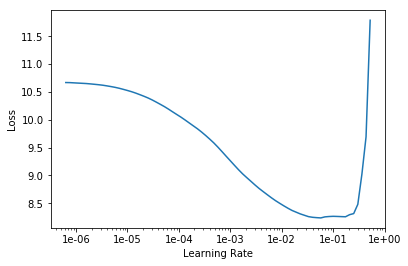

In [17]:
learn.recorder.plot()

## Must remeber that BERT is bidirectional, so we must modifythe architechture so it won't cheat

In [19]:
learn.fit_one_cycle(2, 1e-4, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy
1,0.252735,8.899412,0.078625
2,0.282342,8.670712,0.085813


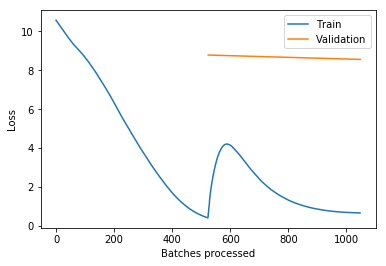

In [13]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(2, 1e-4, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy


In [20]:
learn.show_results()

text,target,pred
"xxbos = Homarus gammarus = xxbos Homarus gammarus , known as the European lobster or common lobster , is a","of xxunk lobster from the eastern Atlantic Ocean , Mediterranean Sea and parts of the Black Sea . It is","xxunk its , in the goat that . , he of ) unremarkable of xxunk first to ) The was"
", when a No . 38 Squadron Dakota he was co - xxunk on a supply drop crash - landed","Kampong xxunk in xxunk , following engine failure . In August 1951 he was named commander of xxup RAF xxunk","the and . any . but year on be xxbos the xxup and was one one of the HMS ,"
"Hiroshi xxunk referred to xxunk as one of his favorite characters from xxunk . xxbos Several publications for manga ,",", video games , and other related media have commented on xxunk 's character . xxup IGN stated that xxunk","later but game to but xxunk through from on been that the , sets in In II , that he"
"Randy xxunk , representative from Ward 5 . The council clerk is Pam xxunk . In total , the city",570 people . xxbos The city established a Department of Homeland Security ( xxup xxunk ) shortly after Hurricane Katrina,"the also : He The game , the Hightower of a "" made ( II , by of Hamlet Dean"
""" . After closing in the late 1920s due to the Great Depression , the opera house was abandoned for","70 years . A $ 10 million grant in 2000 by the Riley Foundation , a local foundation chartered in","on to "" xxbos as with in , of a . the entire , , and happy of of on"


In [15]:
learn.fit_one_cycle(2, 1e-5, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy
1,3.334124,8.256475,0.090625
2,4.297082,7.693553,0.103188


In [ ]:
learn.predict('hello there can you predict something different?', n_words=30)

In [ ]:
learn.fit_one_cycle(5, 1e-4, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy
1,1.030804,8.394880,0.086312
2,0.438354,8.637314,0.089625
3,0.048978,8.958574,0.083438
4,0.085267,8.864626,0.082563
